<a href="https://colab.research.google.com/github/Saransh-khandelwal-123/CODSOFT-ML/blob/main/CREDIT_CARD_FRAUD_DETECTION_by_SARANSH_KHANDELWAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np    # linear algebra
import pandas as pd   # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns   # Seaborn is a Python data visualization library based on matplotlib
import matplotlib.pyplot as plt   # Matplotlib is a low level graph plotting library in python that serves as a visualization utility
import plotly.express as px    # allows you to create interactive plots with very little code
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import HistGradientBoostingClassifier


In [115]:
df=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/creditcard.csv")

In [116]:
df.head(6)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0
5,2,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0.0


In [117]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [118]:
df.shape

(17918, 31)

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17918 entries, 0 to 17917
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    17918 non-null  int64  
 1   V1      17918 non-null  float64
 2   V2      17918 non-null  float64
 3   V3      17918 non-null  float64
 4   V4      17918 non-null  float64
 5   V5      17917 non-null  float64
 6   V6      17917 non-null  float64
 7   V7      17917 non-null  float64
 8   V8      17917 non-null  float64
 9   V9      17917 non-null  float64
 10  V10     17917 non-null  float64
 11  V11     17917 non-null  float64
 12  V12     17917 non-null  float64
 13  V13     17917 non-null  float64
 14  V14     17917 non-null  float64
 15  V15     17917 non-null  float64
 16  V16     17917 non-null  float64
 17  V17     17917 non-null  float64
 18  V18     17917 non-null  float64
 19  V19     17917 non-null  float64
 20  V20     17917 non-null  float64
 21  V21     17917 non-null  float64
 22

In [120]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,17918.000000,17918.000000,17918.000000,17918.000000,17918.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,...,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000,17917.000000
mean,13905.276259,-0.244970,0.258166,0.777804,0.291614,-0.146329,0.099878,-0.150970,0.012969,0.734707,...,-0.052197,-0.146256,-0.038504,0.014510,0.119974,0.036454,0.014558,0.007047,67.504000,0.004521
std,9867.916251,1.893161,1.508296,1.766872,1.479519,1.423917,1.327756,1.342027,1.318460,1.273597,...,0.826158,0.634077,0.526168,0.588938,0.438850,0.537046,0.397673,0.248679,189.184677,0.067087
min,0.000000,-30.552380,-40.978852,-31.103685,-5.172595,-32.092129,-23.496714,-26.548144,-23.632502,-7.175097,...,-11.468435,-8.593642,-26.751119,-2.687773,-7.495741,-1.338556,-8.567638,-3.575312,0.000000,0.000000
25%,3781.250000,-0.959806,-0.305367,0.338327,-0.629972,-0.729796,-0.651820,-0.599770,-0.175261,-0.102798,...,-0.262581,-0.556175,-0.173509,-0.330602,-0.140146,-0.345451,-0.071486,-0.011786,5.490000,0.000000
50%,12347.500000,-0.306803,0.235061,0.924255,0.230058,-0.192681,-0.169764,-0.076457,0.020846,0.726588,...,-0.119493,-0.118803,-0.046656,0.063623,0.158356,-0.030200,0.003094,0.018529,15.950000,0.000000
75%,23775.000000,1.164015,0.876538,1.557391,1.155770,0.347812,0.493661,0.447398,0.272076,1.480254,...,0.041561,0.250886,0.072758,0.398391,0.397765,0.342446,0.098968,0.077345,56.670000,0.000000
max,29031.000000,1.960497,16.713389,4.101716,11.927512,34.099309,21.393069,34.303177,20.007208,10.392889,...,22.614889,4.534454,13.876221,3.695503,5.525093,3.517346,8.254376,4.860769,7712.430000,1.000000


In [121]:
f = df[df['Class'] == 1]
s = df[df['Class'] == 0]
print('The number of fraud transactions are {}'.format(f.shape[0]))
print('The number of safe transactions are {}'.format(s.shape[0]))

The number of fraud transactions are 81
The number of safe transactions are 17836


In [122]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        1
V6        1
V7        1
V8        1
V9        1
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [123]:
# Assuming you have a DataFrame named 'df'
columns_to_check = ['V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                    'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
                    'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

# Filter rows where any of the specified columns contain null values
filtered_df = df[df[columns_to_check].isnull().any(axis=1)]

# Display the filtered DataFrame
print(filtered_df)

        Time        V1        V2        V3        V4  V5  V6  V7  V8  V9  ...  \
17917  29031  1.050204  0.078269  0.484733  1.349623 NaN NaN NaN NaN NaN  ...   

       V21  V22  V23  V24  V25  V26  V27  V28  Amount  Class  
17917  NaN  NaN  NaN  NaN  NaN  NaN  NaN  NaN     NaN    NaN  

[1 rows x 31 columns]


In [124]:
df.dropna(axis=0, inplace=True)

In [125]:
df.shape

(17917, 31)

In [126]:
df.Amount.sum()

1209469.17

In [127]:
f.Amount.describe()

count      81.000000
mean       98.105926
std       267.464067
min         0.000000
25%         1.000000
50%         1.000000
75%        99.990000
max      1809.680000
Name: Amount, dtype: float64

In [128]:
s.Amount.describe()

count    17836.000000
mean        67.365025
std        188.754429
min          0.000000
25%          5.490000
50%         15.950000
75%         56.232500
max       7712.430000
Name: Amount, dtype: float64

In [129]:
s.Amount.describe()

count    17836.000000
mean        67.365025
std        188.754429
min          0.000000
25%          5.490000
50%         15.950000
75%         56.232500
max       7712.430000
Name: Amount, dtype: float64

Text(0.5, 1.0, 'Distribution of Fraud and Safe transactions ')

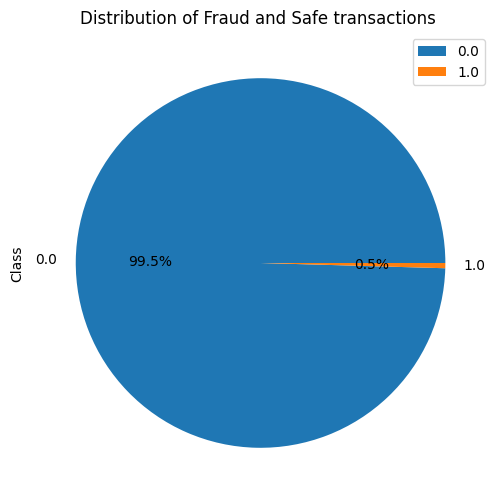

In [130]:
m = df['Class'].value_counts()
m.plot(kind ='pie', autopct = '%1.1f%%', figsize = (12,6))
plt.legend()
plt.title('Distribution of Fraud and Safe transactions ')

Text(0, 0.5, 'Mean of Transaction Amount')

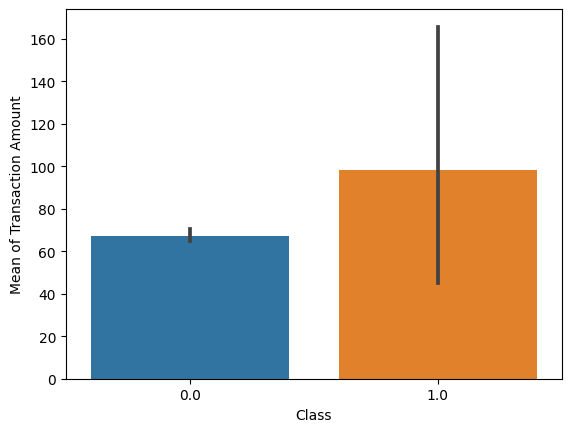

In [131]:
sns.barplot(data=df, x='Class', y='Amount')
plt.ylabel('Mean of Transaction Amount')

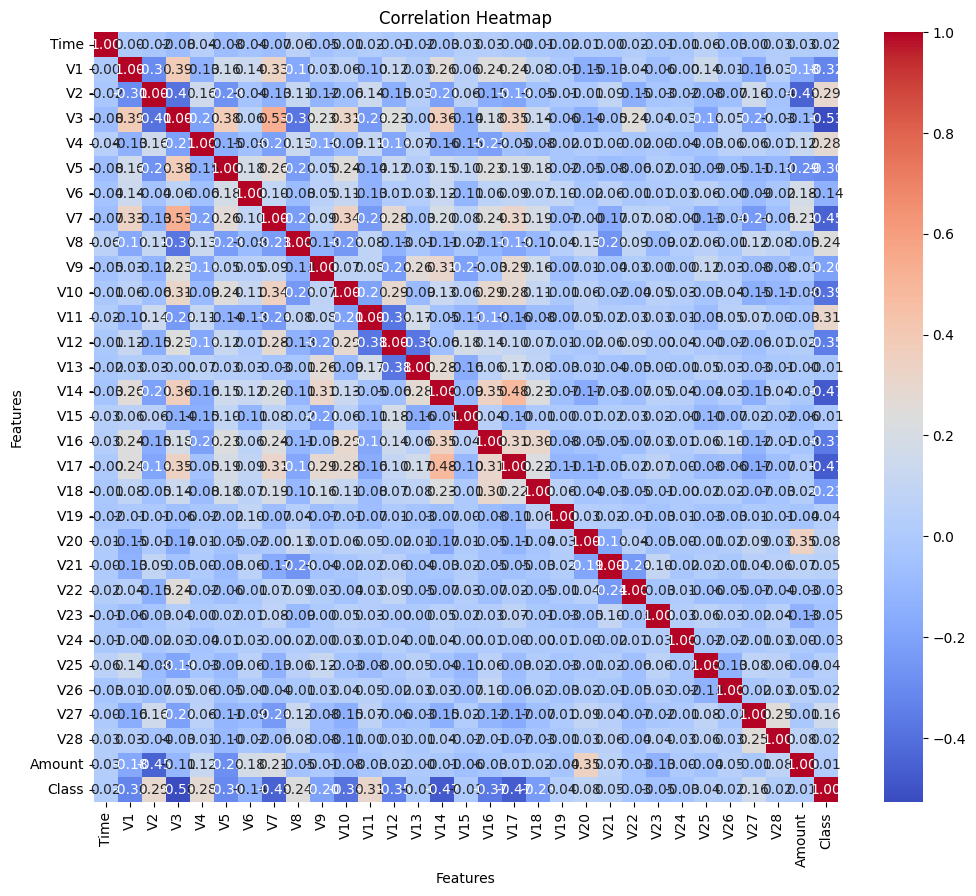

In [132]:


# Assuming you have a DataFrame named 'df' containing the specified columns
columns_to_visualize = ['Time', 'V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                        'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
                        'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

# Create a correlation matrix for the selected columns
correlation_matrix = df[columns_to_visualize].corr()

# Create the heatmap using seaborn
plt.figure(figsize=(12, 10))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Add labels and title
plt.xlabel("Features")
plt.ylabel("Features")
plt.title("Correlation Heatmap")

# Display the heatmap
plt.show()


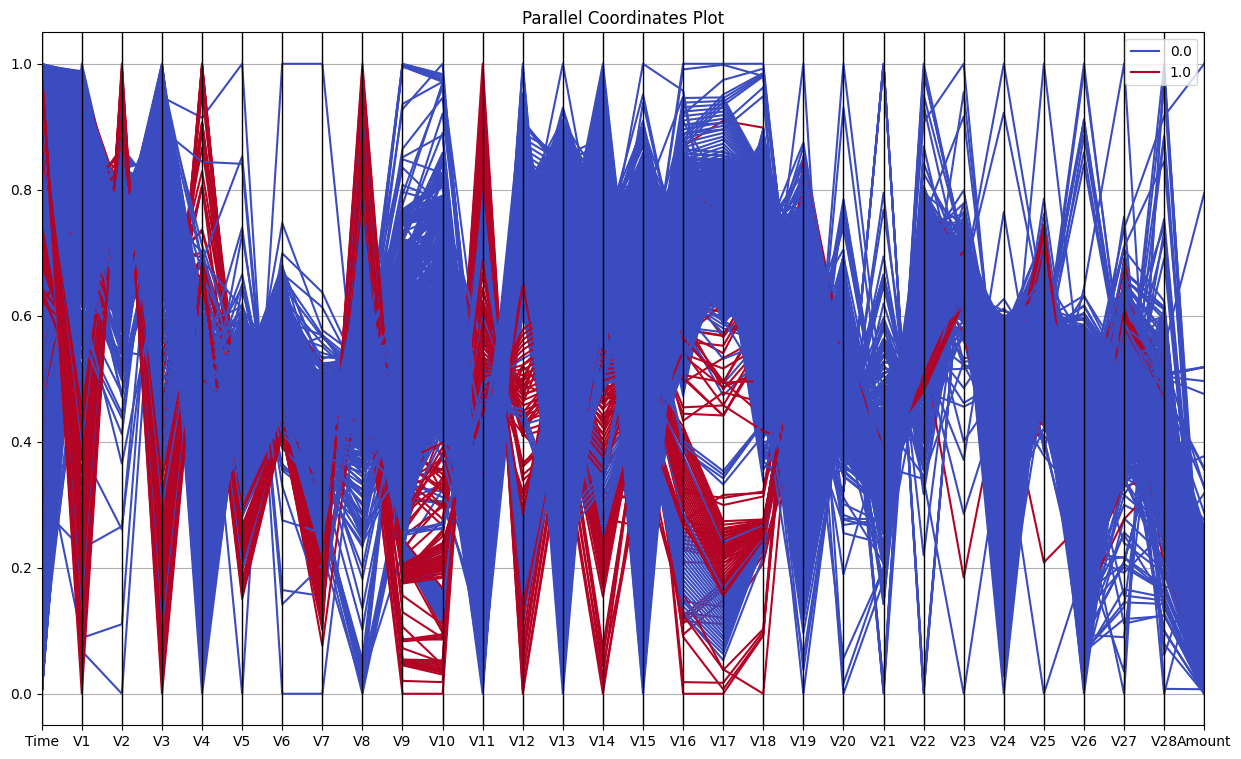

In [133]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df' containing the specified columns
columns_to_visualize = ['Time', 'V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                        'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
                        'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']

# Normalize the data for better visualization (optional but recommended)
df_normalized = (df[columns_to_visualize] - df[columns_to_visualize].min()) / (df[columns_to_visualize].max() - df[columns_to_visualize].min())

# Add the 'Class' column back to the normalized DataFrame
df_normalized['Class'] = df['Class']

# Create the Parallel Coordinates Plot using matplotlib
plt.figure(figsize=(15, 9))
pd.plotting.parallel_coordinates(df_normalized, 'Class', colormap='coolwarm')

# Customize the plot
plt.title("Parallel Coordinates Plot")
plt.legend(loc='upper right')

# Display the plot
plt.show()


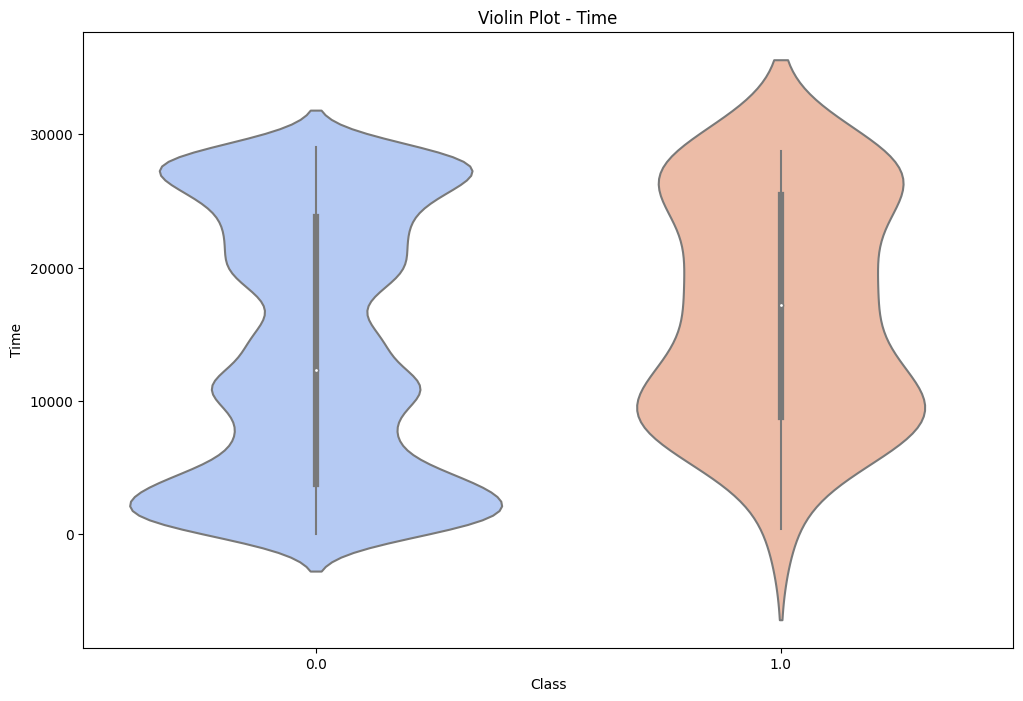

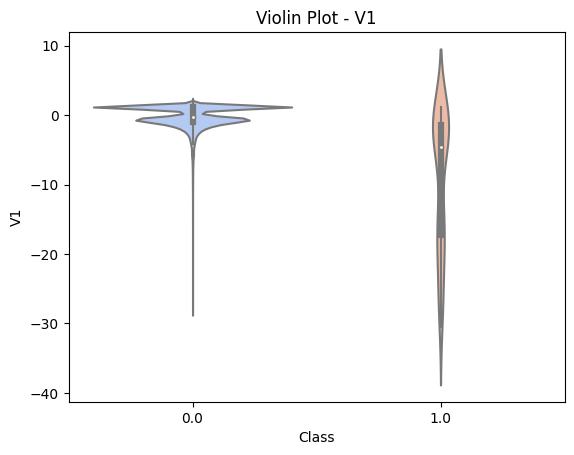

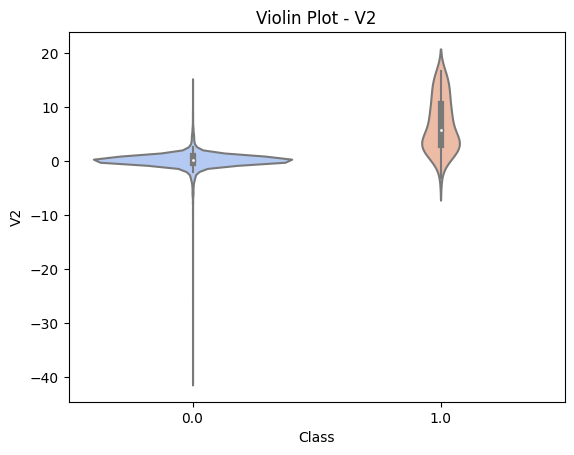

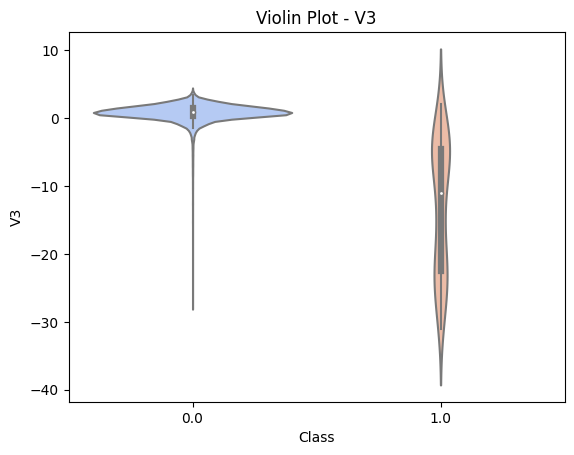

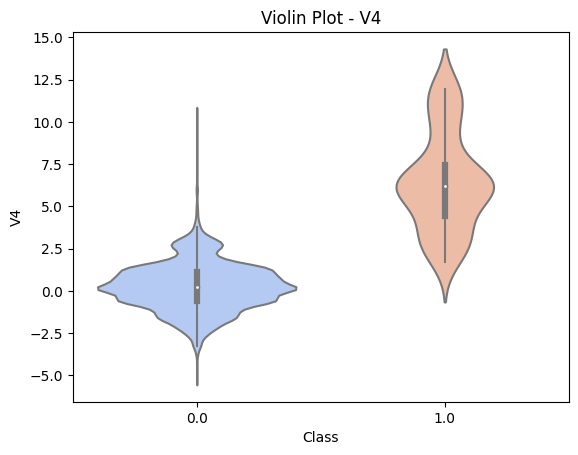

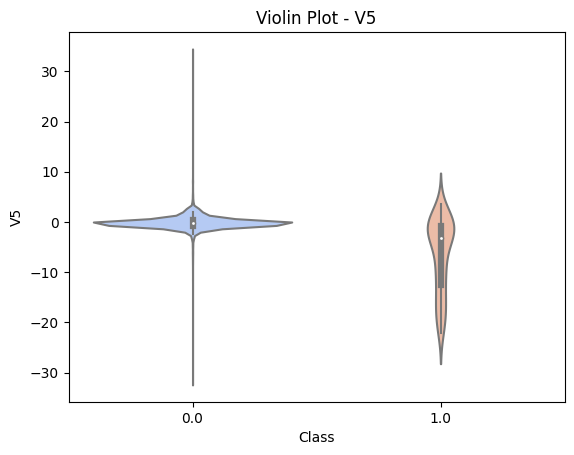

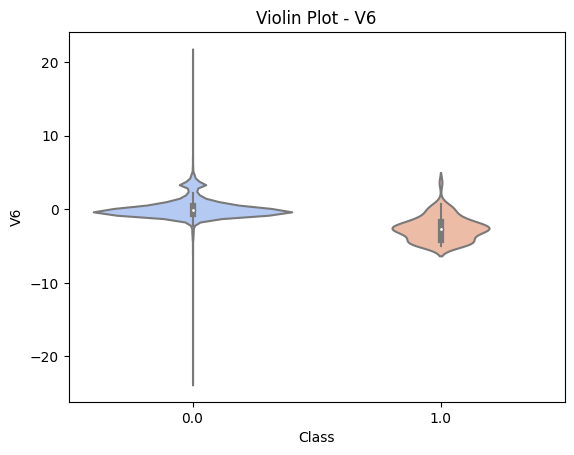

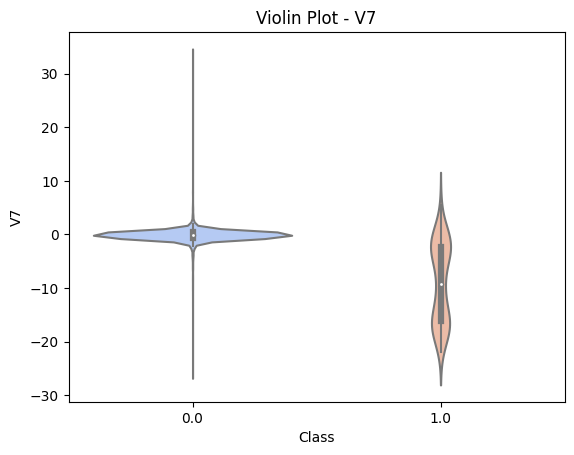

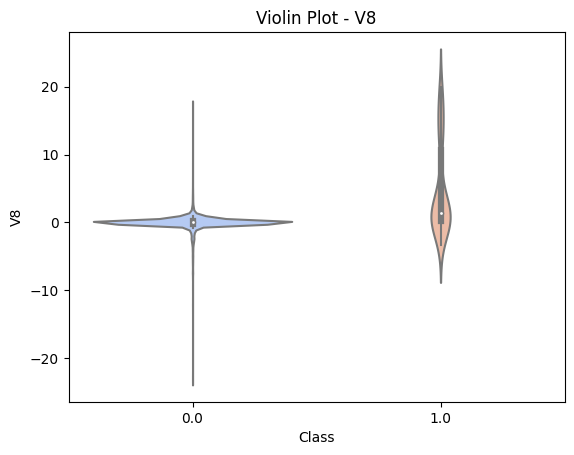

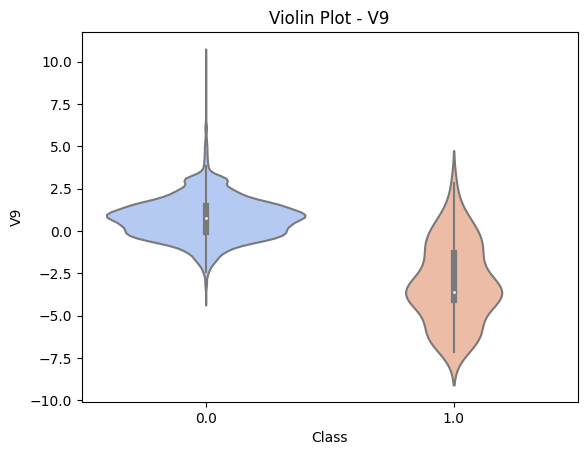

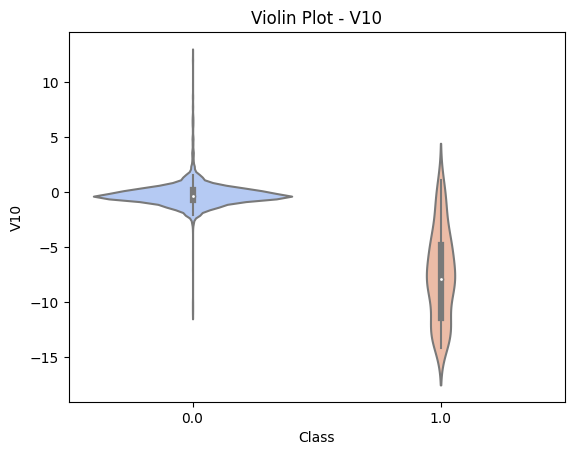

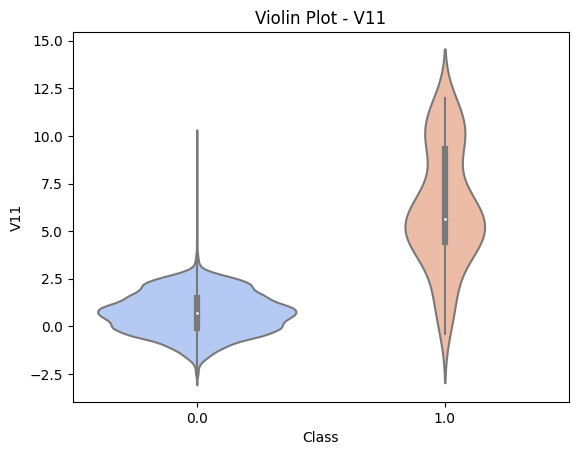

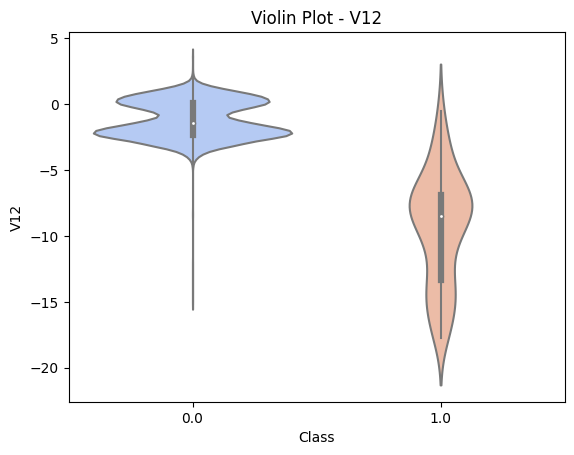

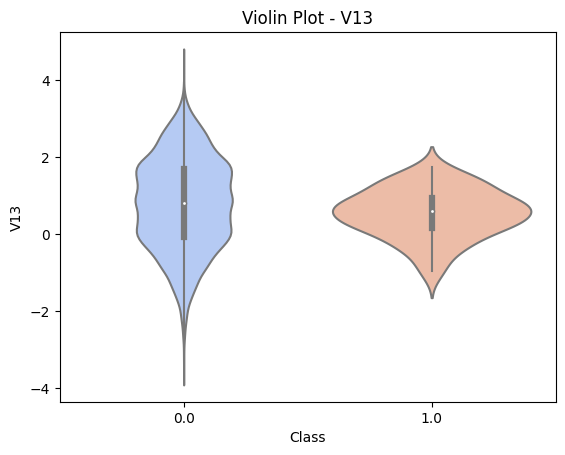

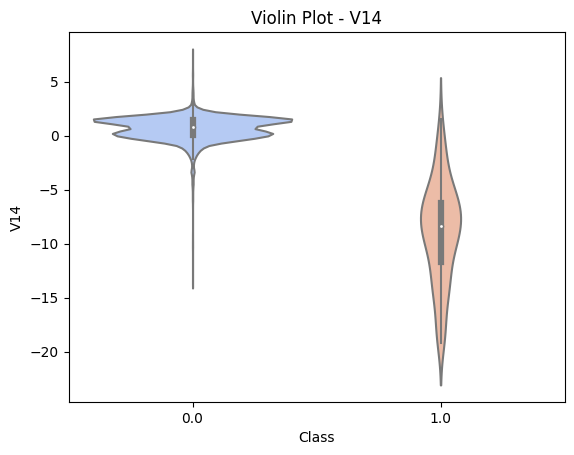

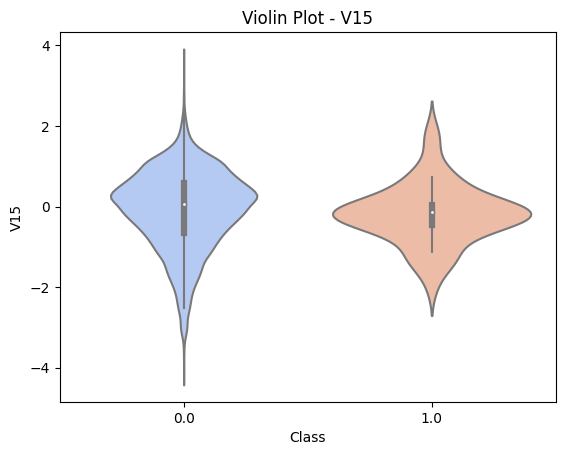

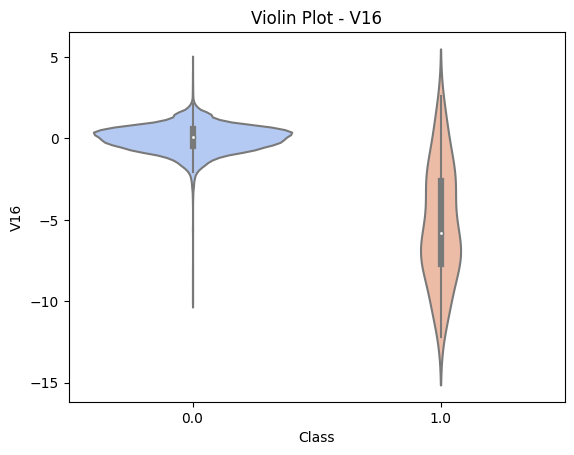

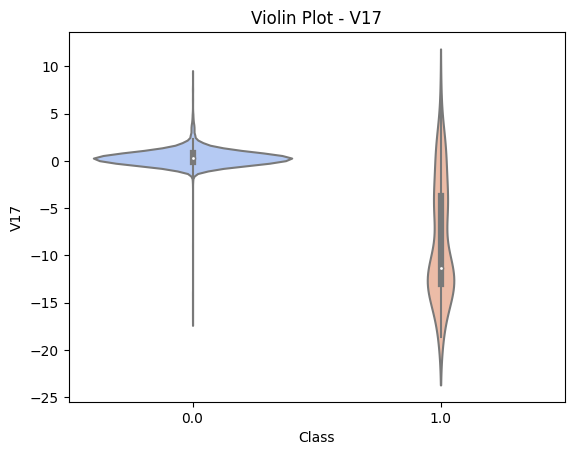

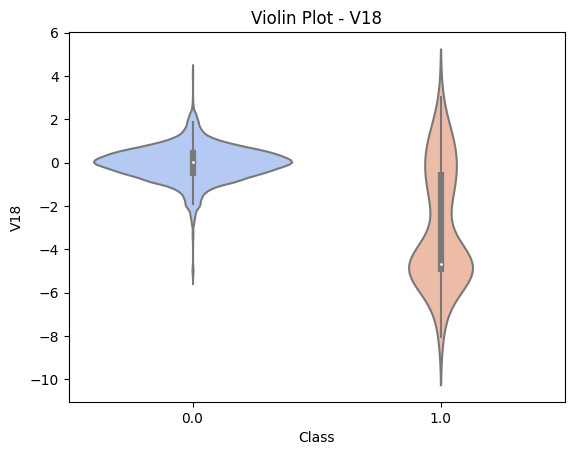

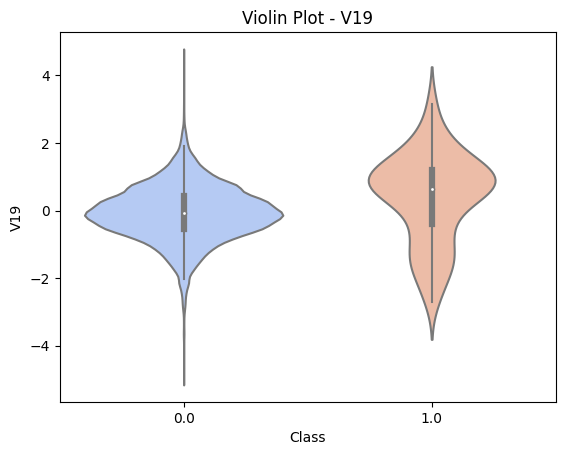

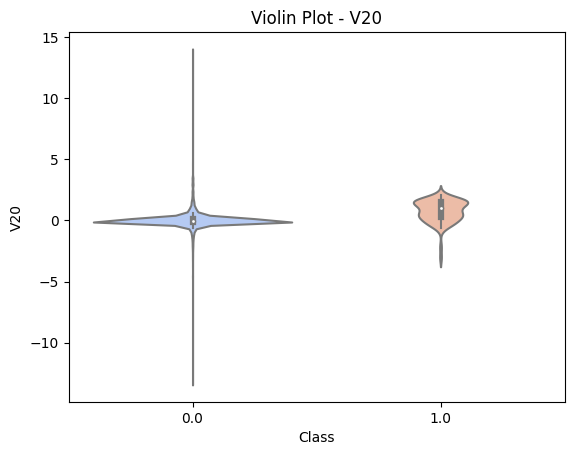

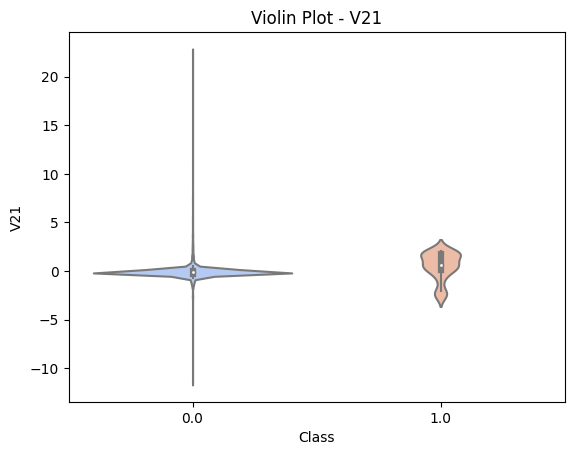

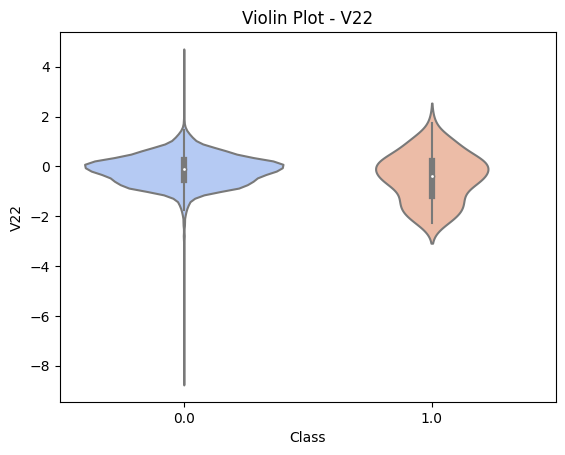

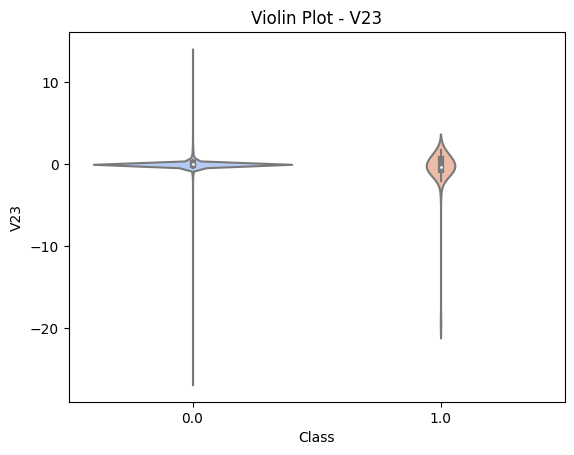

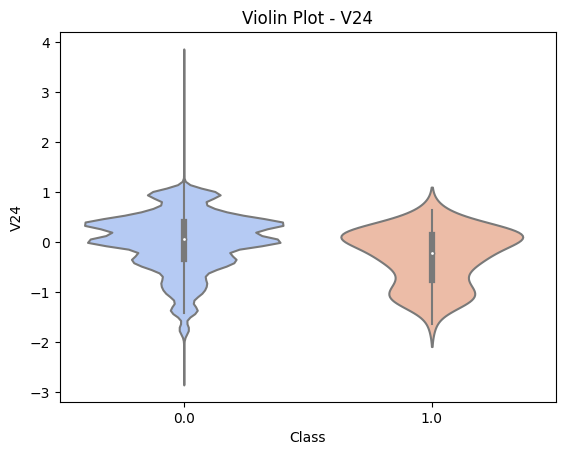

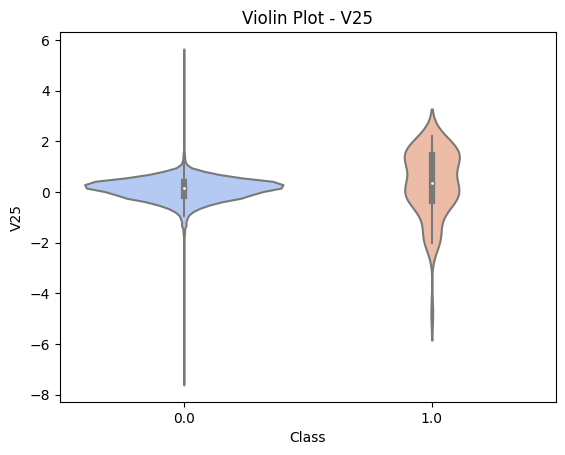

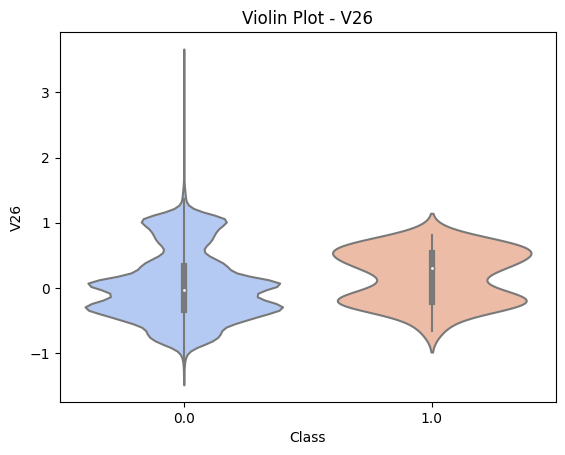

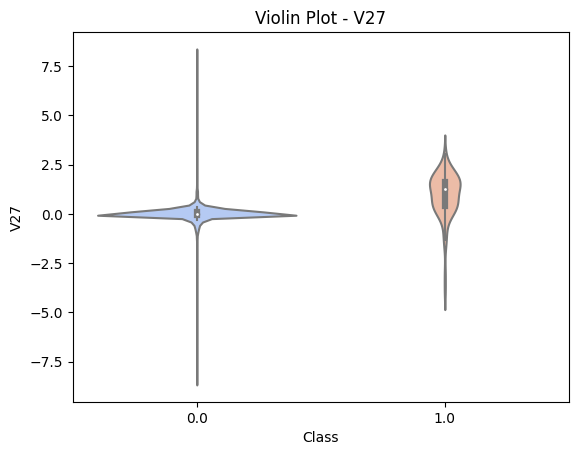

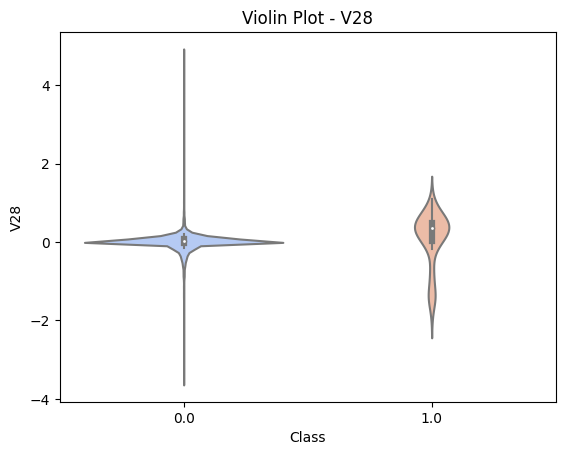

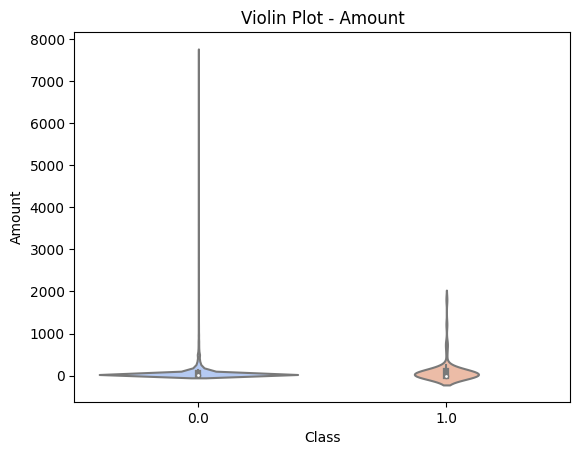

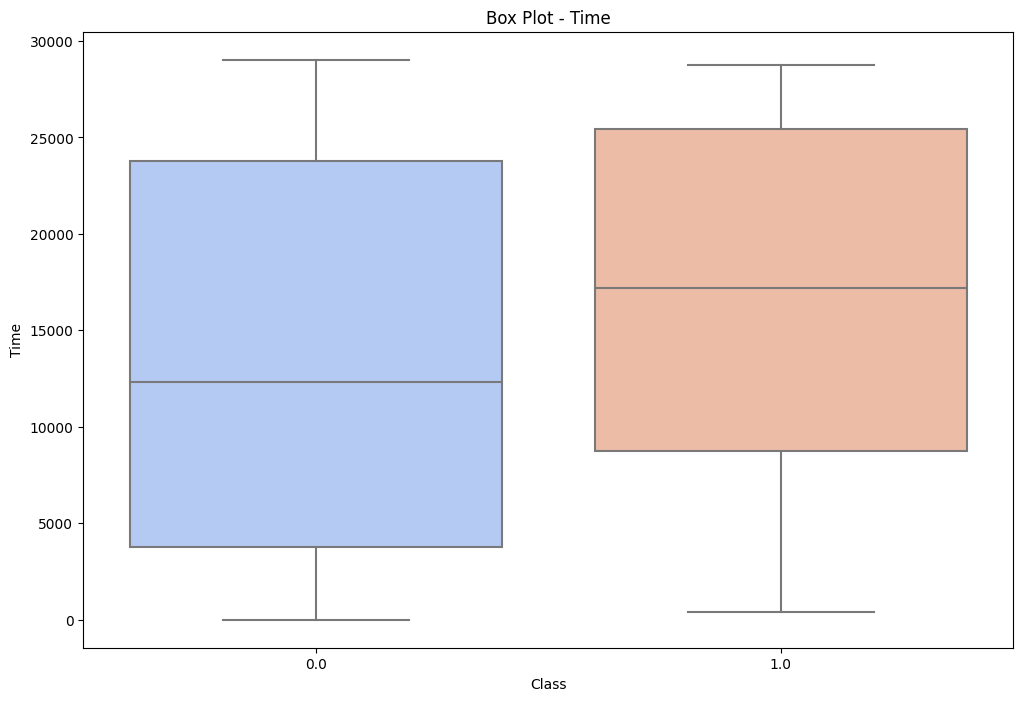

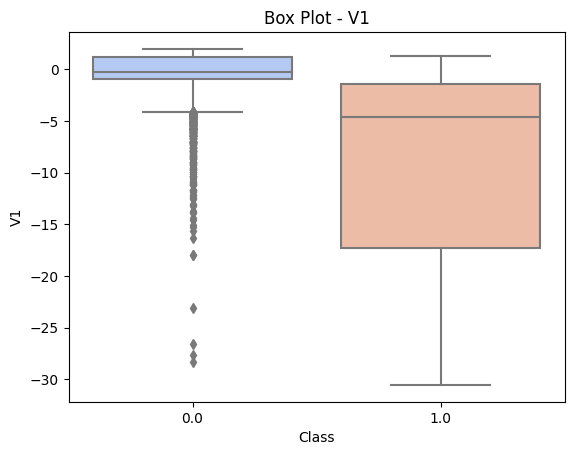

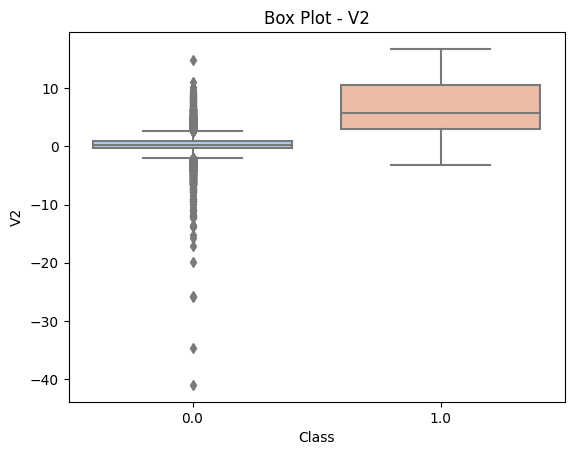

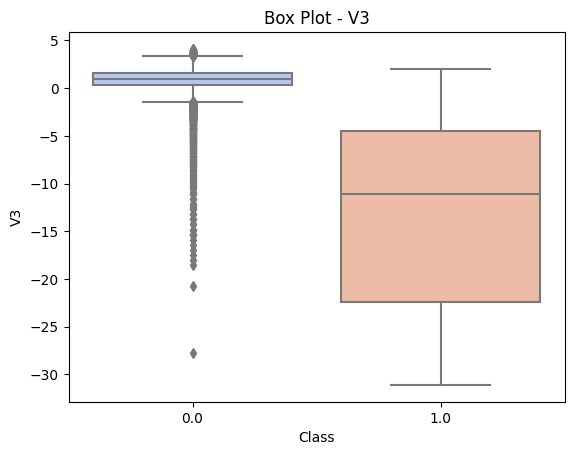

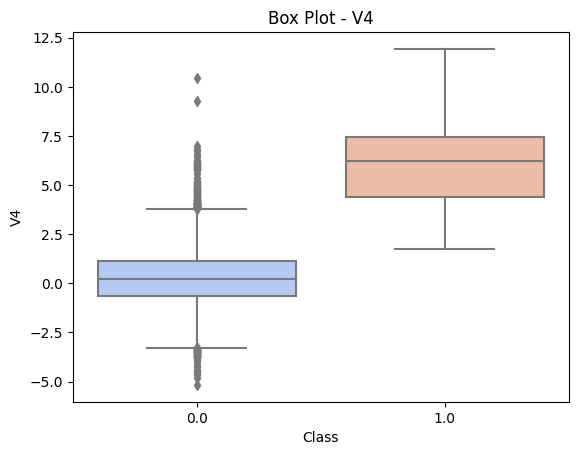

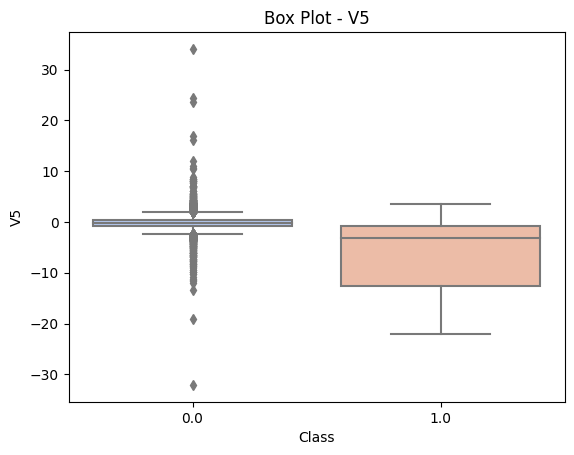

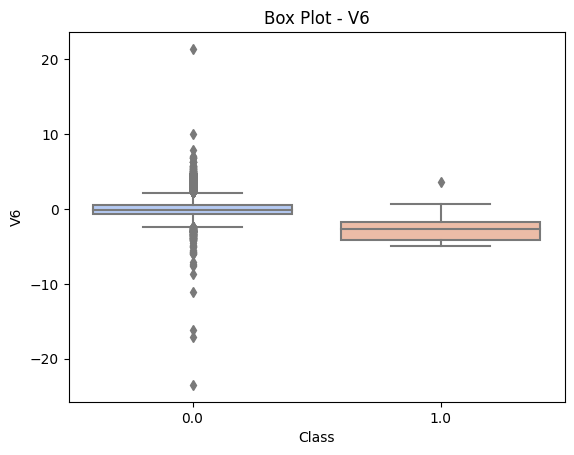

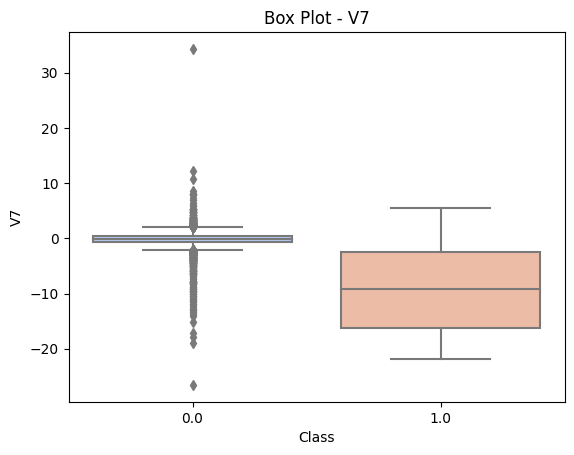

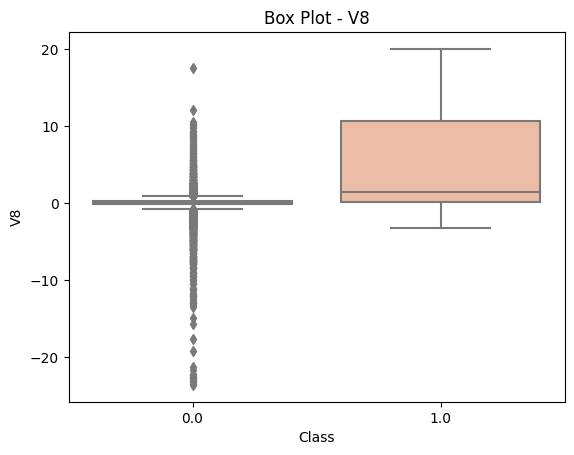

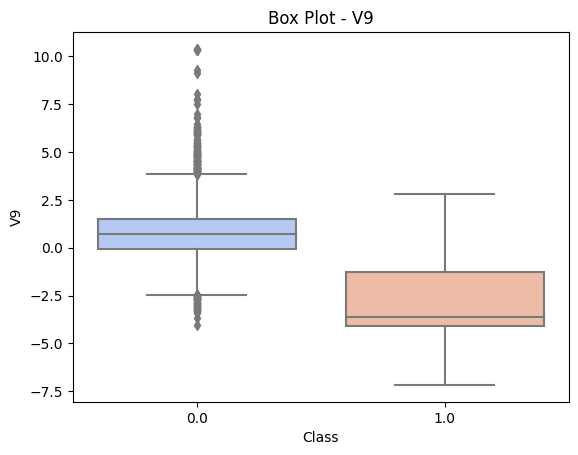

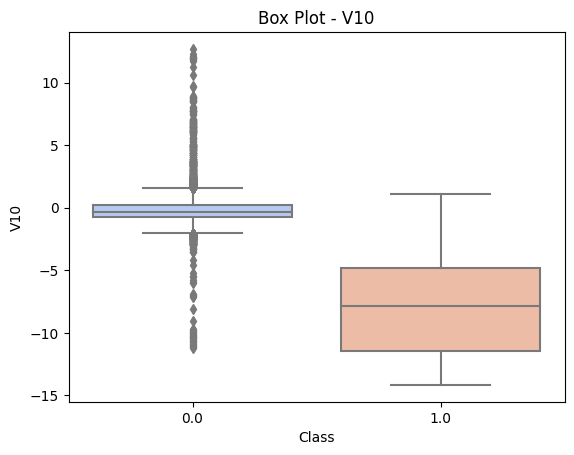

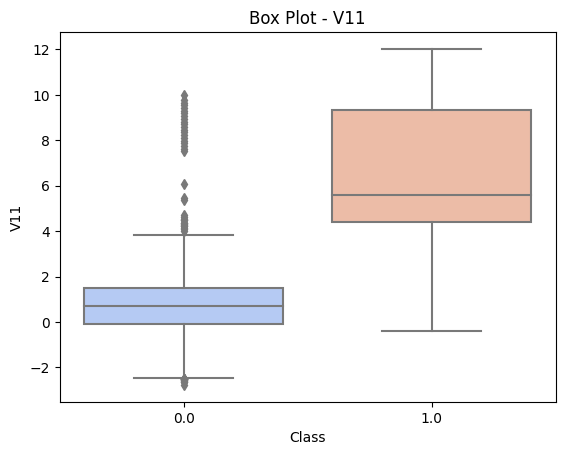

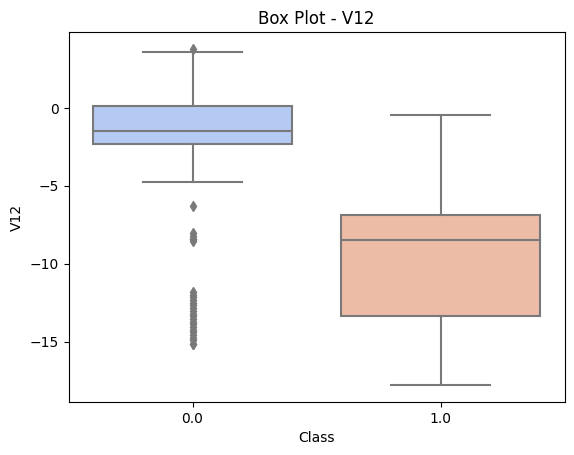

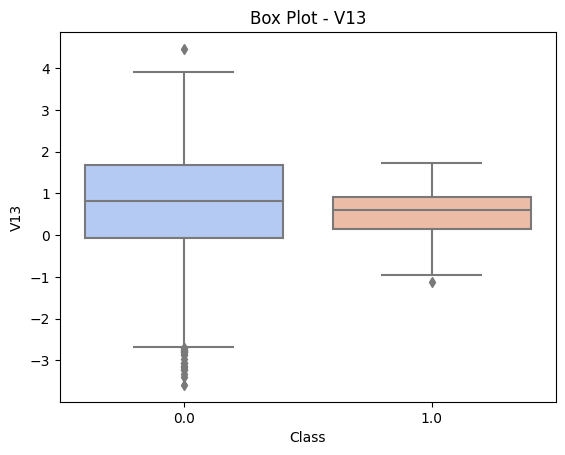

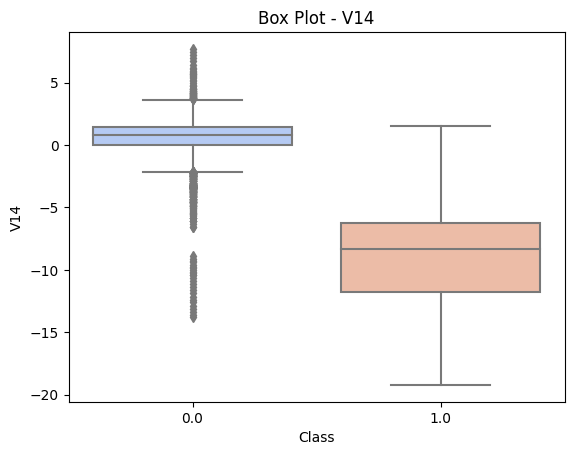

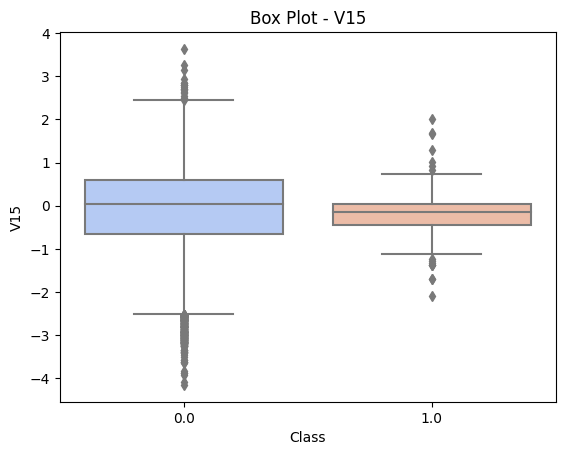

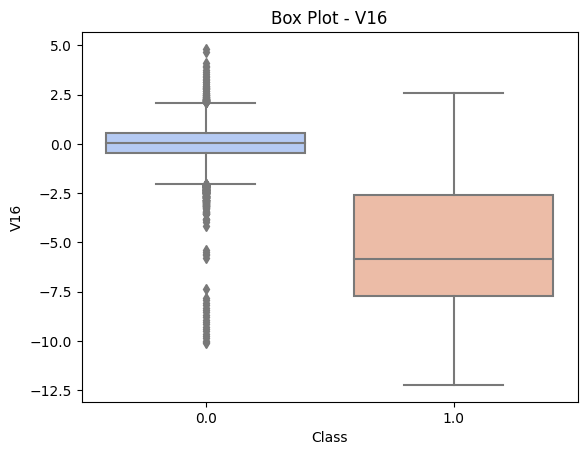

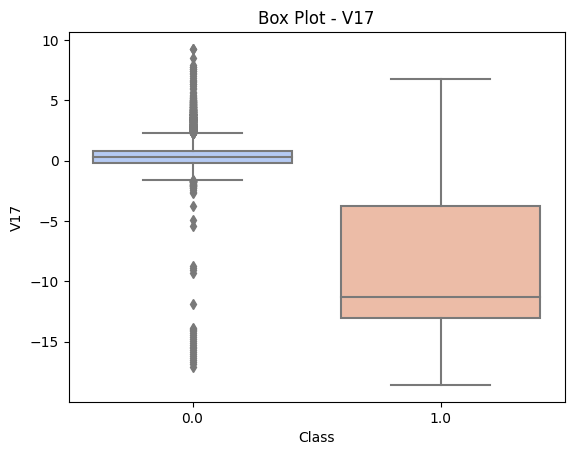

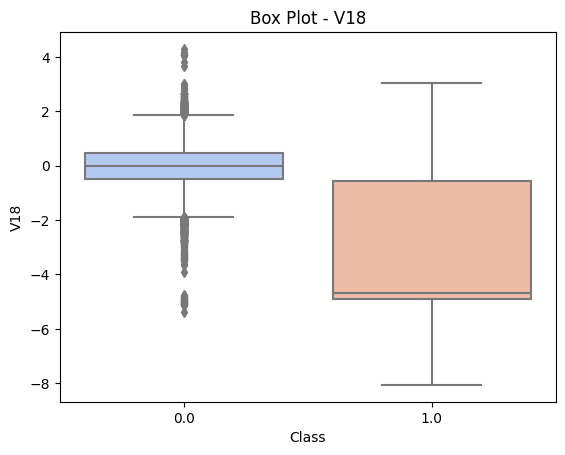

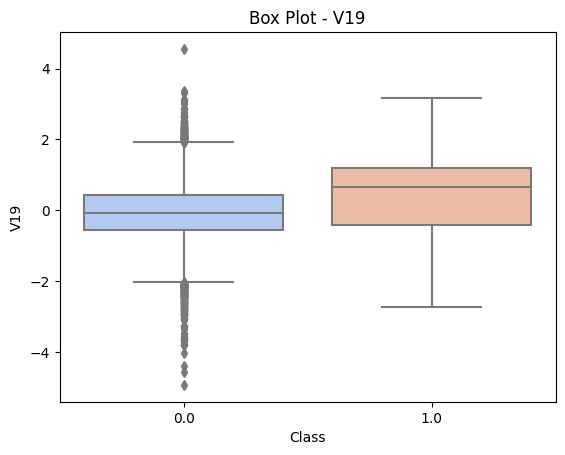

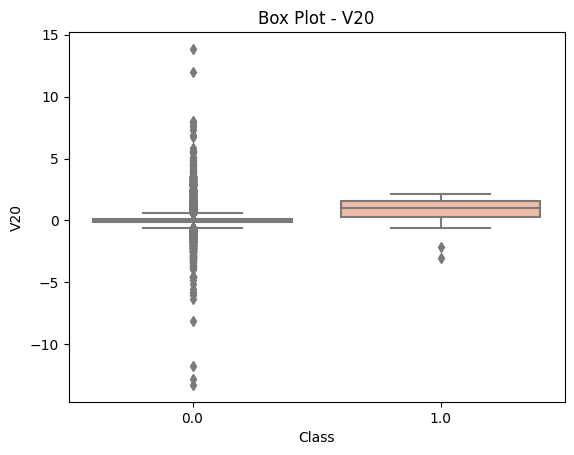

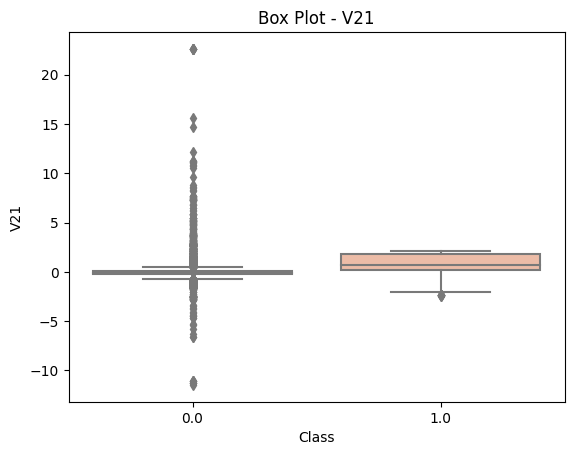

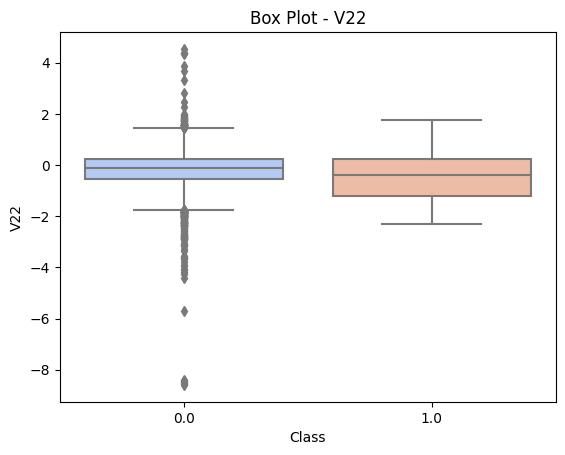

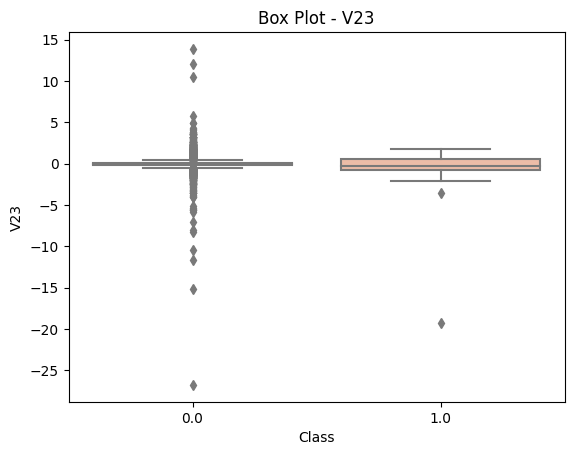

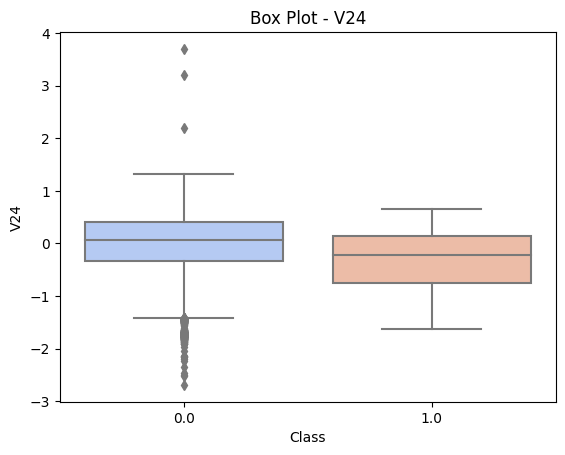

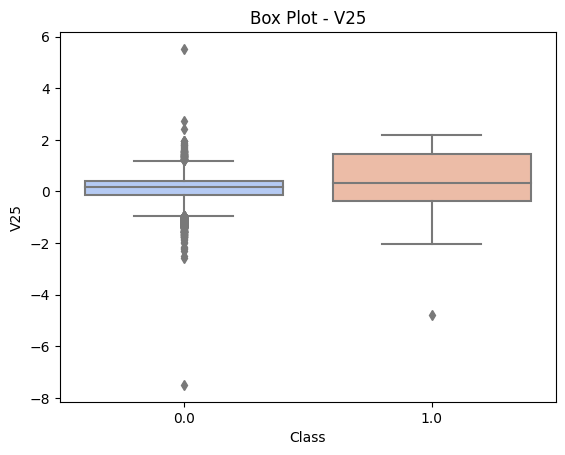

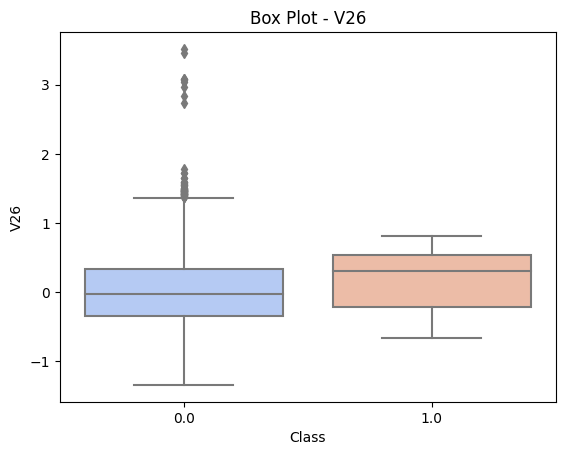

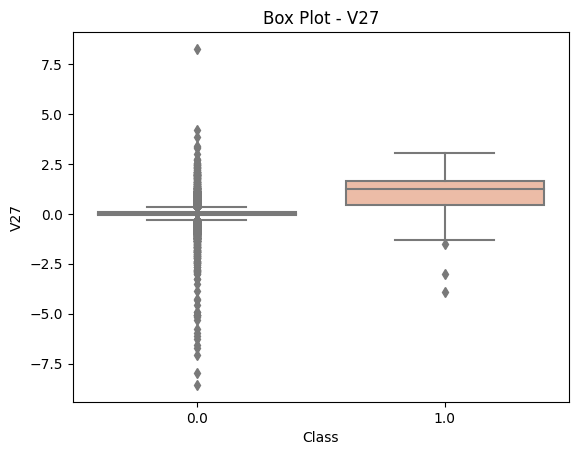

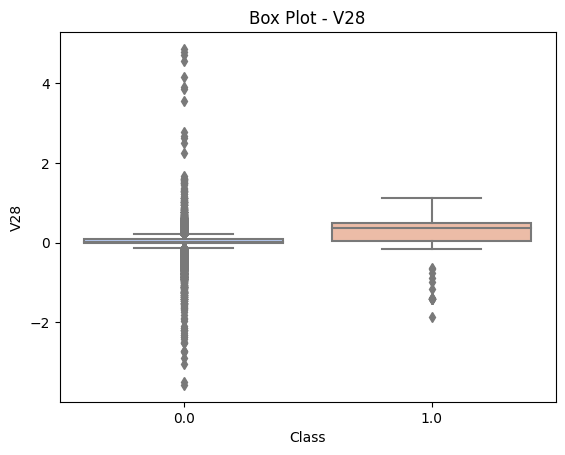

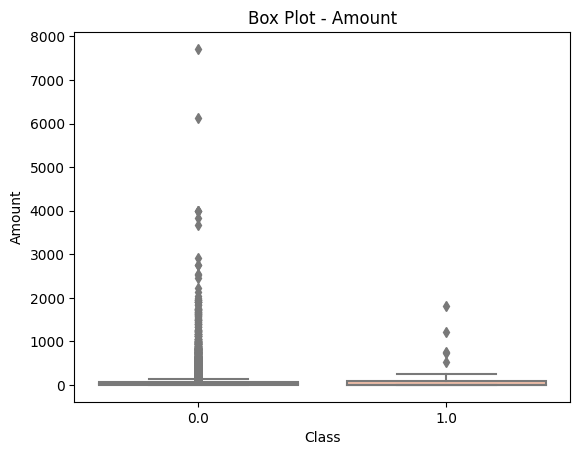

In [134]:
# Assuming you have a DataFrame named 'df' containing the specified columns
columns_to_visualize = ['Time', 'V1', 'V2', 'V3', 'V4','V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14',
                        'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23',
                        'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']

# Create Violin Plots for the specified columns
plt.figure(figsize=(12, 8))
for col in columns_to_visualize:
    sns.violinplot(x='Class', y=col, data=df, palette='coolwarm')
    plt.title(f"Violin Plot - {col}")
    plt.show()

# Create Box Plots for the specified columns
plt.figure(figsize=(12, 8))
for col in columns_to_visualize:
    sns.boxplot(x='Class', y=col, data=df, palette='coolwarm')
    plt.title(f"Box Plot - {col}")
    plt.show()


In [135]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score
from imblearn.over_sampling import SMOTE

# Separate features and target variable
X = df.drop('Class', axis=1)
y = df['Class']

# Data preprocessing
# Handle missing values (if any)
X.fillna(0, inplace=True)

# Feature engineering (if any)

# Normalize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handling class imbalance using SMOTE (oversampling)
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Train a histogram-based gradient boosting classifier (HistGradientBoostingClassifier)
hgbc_classifier = HistGradientBoostingClassifier(random_state=42)
hgbc_classifier.fit(X_train_resampled, y_train_resampled)

# Predict on the test set
y_pred = hgbc_classifier.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy*100)

# Get classification report with precision, recall, and F1-score
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)


Accuracy: 99.91629464285714
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      3566
         1.0       0.89      0.94      0.92        18

    accuracy                           1.00      3584
   macro avg       0.95      0.97      0.96      3584
weighted avg       1.00      1.00      1.00      3584

